# KNN

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (assuming it's in CSV format)
df = pd.read_csv('NPHA-doctor-visits.csv')

# 1. Remove the 'Age' column
df = df.drop(columns=['Age'])

# 2. Replace -1 and -2 with the most frequent value in each column
for column in df.columns:
    most_frequent_value = df[column].mode()[0]  # Get the most frequent value in the column
    df[column] = df[column].replace([-1, -2], most_frequent_value)  # Replace -1 and -2

# 3. Separate features (X) and target variable (y)
X = df.drop(columns=['Number of Doctors Visited'])  # Assuming 'Number of Doctors Visited' is the target variable
y = df['Number of Doctors Visited']  # Target variable

# 4. One-hot encode categorical variables if necessary
X = pd.get_dummies(X)

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of k
knn.fit(X_train_scaled, y_train)

# 8. Make predictions
y_pred = knn.predict(X_test_scaled)

# 9. Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.4405594405594406
Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.11      0.14        28
           2       0.53      0.69      0.60        74
           3       0.30      0.22      0.25        41

    accuracy                           0.44       143
   macro avg       0.34      0.34      0.33       143
weighted avg       0.39      0.44      0.41       143



# KNN improved

C:\Users\Niloy\AppData\Local\Temp\ipykernel_18756\2432683168.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)
C:\Users\Niloy\AppData\Local\Temp\ipykernel_18756\2432683168.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.apply(lambda col: col.fillna(col.mode()[0]))


Shape of X_train: (892, 5)
Shape of X_test: (224, 5)
Shape of y_train: (892,)
Shape of y_test: (224,)
Shape of y_pred_train: (892,)
Shape of y_pred_test: (224,)
Train Accuracy: 0.5437219730941704
Test Accuracy: 0.49107142857142855

Confusion Matrix for Train Set:
[[219  47  35]
 [105 132  60]
 [ 84  76 134]]

Confusion Matrix for Test Set:
[[50 11 10]
 [29 33 13]
 [29 22 27]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.46      0.70      0.56        71
      2 (2-3 doctors)       0.50      0.44      0.47        75
3 (4 or more doctors)       0.54      0.35      0.42        78

             accuracy                           0.49       224
            macro avg       0.50      0.50      0.48       224
         weighted avg       0.50      0.49      0.48       224


Classification Report for Train Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.54      

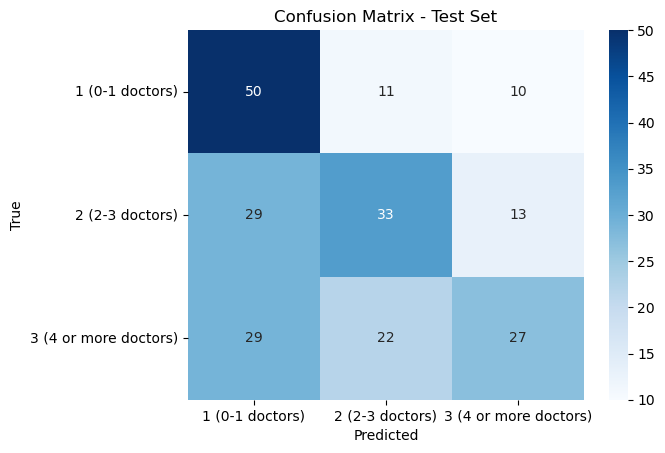

In [27]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('NPHA-doctor-visits.csv')

# Drop the 'Age' column
dataset = dataset.drop('Age', axis=1)

# Select relevant features (Dental Health, Mental Health, Physical Health, Race, Employment)
X = dataset[['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']]

# Target variable: Number of Doctors Visited
y = dataset['Number of Doctors Visited']

# Handle missing or unwanted values (-1 for "Refused" or -2 for "Not asked")
X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)

# Optionally, fill missing values with the most frequent value in each column
X = X.apply(lambda col: col.fillna(col.mode()[0]))

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder to use it later if needed

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Print the shapes of the datasets to ensure consistency
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of k

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = knn_classifier.predict(X_train)
y_pred_test = knn_classifier.predict(X_test)
6
# Print the shapes of predictions to ensure consistency
print(f"Shape of y_pred_train: {y_pred_train.shape}")
print(f"Shape of y_pred_test: {y_pred_test.shape}")

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
def calculate_tpr_fpr(cm):
    tpr_fpr = {}
    for i in range(cm.shape[0]):  # Loop through each class
        TP = cm[i][i]  # True positives are the diagonal elements
        FN = sum(cm[i]) - TP  # False negatives are the sum of the row minus the TP
        FP = sum(cm[:, i]) - TP  # False positives are the sum of the column minus the TP
        TN = sum(sum(cm)) - (TP + FN + FP)  # True negatives are the total minus TP, FN, FP
        
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
        
        tpr_fpr[i] = {'TPR': TPR, 'FPR': FPR}
    return tpr_fpr

# Calculate TPR and FPR for the confusion matrices
tpr_fpr_train = calculate_tpr_fpr(cm_train)
tpr_fpr_test = calculate_tpr_fpr(cm_test)

# Classification Report for test and train sets
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
class_report_train = classification_report(y_train, y_pred_train, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])

# Print results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")
print(f"\nClassification Report for Train Set:\n{class_report_train}")

# Print TPR and FPR for both sets
print("\nTrue Positive Rate (TPR) and False Positive Rate (FPR) for Train Set:")
for i, metrics in tpr_fpr_train.items():
    print(f"Class {i+1}: TPR = {metrics['TPR']:.2f}, FPR = {metrics['FPR']:.2f}")

print("\nTrue Positive Rate (TPR) and False Positive Rate (FPR) for Test Set:")
for i, metrics in tpr_fpr_test.items():
    print(f"Class {i+1}: TPR = {metrics['TPR']:.2f}, FPR = {metrics['FPR']:.2f}")

# Optional: Visualize the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()
